# Proyek Analisis Data: Bike Sharing
- **Nama:** Dinnuhoni Trahutomo
- **Email:** dinnuhoni.trahutomo@gmail.com
- **ID Dicoding:** dinnuhoni23

## Latar Belakang Bisnis

Sistem penyewaan sepeda telah menjadi inovasi dalam solusi transportasi yang mendukung mobilitas perkotaan, menawarkan pendekatan yang lebih ramah lingkungan, dan mendorong gaya hidup sehat. Pengguna dapat menyewa sepeda di satu lokasi dan mengembalikannya di lokasi lain, memberikan fleksibilitas dalam perjalanan. Dengan lebih dari 500 program penyewaan sepeda di seluruh dunia dan memiliki lebih dari 500.000 sepeda, sistem ini berperan penting dalam mengurangi kemacetan lalu lintas, polusi udara, dan meningkatkan kesehatan masyarakat.

Data yang diperoleh dapat digunakan oleh para stakeholders, termasuk pengelola kota, operator transportasi, dan peneliti untuk membuat keputusan yang lebih baik terkait infrastruktur, perencanaan kota, dan penyediaan layanan publik untuk membuat analisis dan menentukan kelanjutan yang ingin di eksekusi di kemudian hari.

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apa faktor-faktor utama yang mempengaruhi tingkat penggunaan sepeda pada waktu-waktu tertentu?
- Pertanyaan 2: Bagaimana pola penggunaan sepeda bervariasi antara hari kerja dan akhir pekan?
- Pertanyaan 3: Bagaimana pola penggunaan sepeda bervariasi berdasarkan tahun, bulan dan minggu?

## Import Semua Packages/Library yang Digunakan

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

## Import & Load Dataset

In [364]:
df_day = pd.read_csv('https://raw.githubusercontent.com/dinnuhoni23/Bangkit_2024_Dicoding/refs/heads/main/day.csv')
df_hour = pd.read_csv('https://raw.githubusercontent.com/dinnuhoni23/Bangkit_2024_Dicoding/refs/heads/main/hour.csv')

In [365]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [366]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Data Wrangling

### Gathering Data

### Data Analysis/Analisis Data

#### 1. Day Analysis/Analisis Hari

In [367]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### 2. Hour Analysis/Analisis Jam

In [368]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### 1. Day Analysis/Analisis Hari

In [369]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [370]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [371]:
print(f"Duplikat dari df_day: {df_day.duplicated().sum()}")

Duplikat dari df_day: 0


In [372]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### 2. Hour Analysis/Analisis Jam

In [373]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [374]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [375]:
print(f"Duplikat dari df_hour: {df_hour.duplicated().sum()}")

Duplikat dari df_hour: 0


In [376]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [377]:
drop_columns = ['instant', 'atemp', 'windspeed']
df_day.drop(columns=drop_columns, inplace=True)

Disini saya lebih condong menggunakan dataset "df_day". Kolom 'instant' hanya berfungsi sebagai nomor urut data, sehingga tidak relevan untuk analisis. Karena sudah ada kolom suhu asli ('temp'), kolom 'atemp' tidak perlu digunakan lagi. Selain itu, 'windspeed' tidak dianggap penting dalam menganalisis pengaruh cuaca terhadap penggunaan sepeda, karena faktor suhu dan musim lebih signifikan. Menghapus kolom-kolom tersebut akan menyederhanakan dan memperjelas fokus analisis.

In [378]:
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,82,1518,1600


In [379]:
df_day.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'hum': 'humidity',
    'cnt': 'total'
}, inplace=True)

df_day.head()

,date,season,year,month,holiday,weekday,workingday,weather_situation,temperature,humidity,casual,registered,total
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,82,1518,1600


In [380]:
df_day['month'] = df_day['month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
df_day['season'] = df_day['season'].replace([1, 2, 3, 4],['Spring', 'Summer', 'Fall', 'Winter'])
df_day['weekday'] = df_day['weekday'].replace([0, 1, 2, 3, 4, 5, 6],['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
df_day['weather_situation'] = df_day['weather_situation'].replace([1, 2, 3, 4],['Clear/Partly Cloudy', 'Misty/Cloudy','Light Snow/Rain', 'Severe Weather'])

Mengubah nilai numerik di beberapa kolom dengan kategori deskriptif:
month: Angka 1-12 diganti dengan nama:

1. month: Angka 1-12 diganti dengan nama bulan singkat ('Jan' hingga 'Dec').
2. season: Angka 1-4 diganti dengan nama musim ('Spring', 'Summer', 'Fall', 'Winter').
3. weekday: Angka 0-6 diganti dengan nama hari ('Sun' hingga 'Sat').
4. weather_situation: Angka 1-4 diganti dengan deskripsi cuaca ('Clear/Partly Cloudy' hingga 'Severe Weather').

In [381]:
df_day['date'] = pd.to_datetime(df_day['date'])

cols_to_category = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_situation']
df_day[cols_to_category] = df_day[cols_to_category].astype('category')

df_day.head()

,date,season,year,month,holiday,weekday,workingday,weather_situation,temperature,humidity,casual,registered,total
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.436957,82,1518,1600


In [382]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    category      
 3   month              731 non-null    category      
 4   holiday            731 non-null    category      
 5   weekday            731 non-null    category      
 6   workingday         731 non-null    category      
 7   weather_situation  731 non-null    category      
 8   temperature        731 non-null    float64       
 9   humidity           731 non-null    float64       
 10  casual             731 non-null    int64         
 11  registered         731 non-null    int64         
 12  total              731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(2), int64(3)
memory us

## Exploratory Data Analysis (EDA)

In [383]:
df_day.groupby(by='month').agg({
    'total': ['max', 'min', 'mean', 'sum']
})

total                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

In [384]:
df_day.groupby(by='weather_situation').agg({
    'total': ['max', 'min', 'mean', 'sum']
})

total                           
                      max  min         mean      sum
weather_situation                                   
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

In [385]:
df_day.groupby(by='month').agg({
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum']
})

casual                          registered                           
         max  min         mean    sum        max   min         mean     sum
month                                                                      
Apr     3252  120  1013.366667  60802       5950   674  3471.533333  208292
Aug     2827  226  1161.919355  72039       6541   889  4502.500000  279155
Dec     1153    9   349.887097  21693       6055   432  3053.919355  189343
Feb     1435   47   262.508772  14963       4546   905  2392.789474  136389
Jan     1070    9   194.225806  12042       4185   416  1982.112903  122891
Jul     3065  562  1260.596774  78157       6790  2298  4303.080645  266791
Jun     2963  477  1231.766667  73906       6456  2993  4540.600000  272436
Mar     3155   46   716.838710  44444       5893   491  2975.419355  184476
May     3410  255  1214.274194  75285       6433  2213  4135.500000  256401
Nov     2290   69   610.050000  36603       5520   935  3637.133333  218228
Oct     3031    2   963.870968  59760       6911    20  4235.354839  262592
Sep     3160  118  1172.050000  70323       6946  1689  4594.466667  275668

In [386]:
# Mengelompokkan berdasarkan holiday
df_day.groupby('holiday').total.agg(['max', 'min', 'mean', 'sum'])

# Mengelompokkan berdasarkan weekday
df_day.groupby('weekday').total.agg(['max', 'min', 'mean'])

# Mengelompokkan berdasarkan workingday
df_day.groupby('workingday').total.agg(['max', 'min', 'mean'])

# Mengelompokkan berdasarkan 'season' untuk casual, registered, dan total
df_day.groupby('season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'total': ['max', 'min', 'mean']
})

# Mengelompokkan berdasarkan 'season' untuk temperature dan humidityidity
df_day.groupby('season').agg({
    'temperature': ['max', 'min', 'mean'],
    'humidity': ['max', 'min', 'mean']
})

# Mengelompokkan berdasarkan 'month' untuk temperature dan humidityidity
df_day.groupby('month').agg({
    'temperature': ['max', 'min', 'mean'],
    'humidity': ['max', 'min', 'mean']
})

# Mengelompokkan berdasarkan 'month' untuk casual, registered, dan total
df_day.groupby('month').agg({
    'casual': 'mean',
    'registered': 'mean',
    'total': ['max', 'min', 'mean']
})

casual   registered total                   
              mean         mean   max   min         mean
month                                                   
Apr    1013.366667  3471.533333  7460   795  4484.900000
Aug    1161.919355  4502.500000  7865  1115  5664.419355
Dec     349.887097  3053.919355  6606   441  3403.806452
Feb     262.508772  2392.789474  5062  1005  2655.298246
Jan     194.225806  1982.112903  4521   431  2176.338710
Jul    1260.596774  4303.080645  8173  3285  5563.677419
Jun    1231.766667  4540.600000  8120  3767  5772.366667
Mar     716.838710  2975.419355  8362   605  3692.258065
May    1214.274194  4135.500000  8294  2633  5349.774194
Nov     610.050000  3637.133333  6852  1495  4247.183333
Oct     963.870968  4235.354839  8156    22  5199.225806
Sep    1172.050000  4594.466667  8714  1842  5766.516667

Melihat korelasi antara variabel

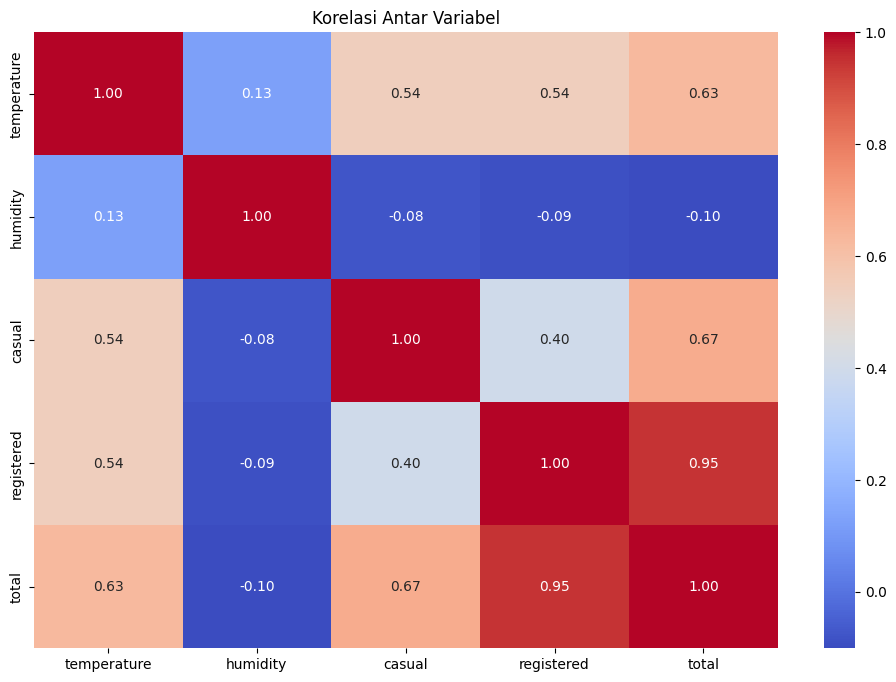

In [387]:
numeric_df = df_day.select_dtypes(include=[float, int])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel')
plt.show()

Penjelasan Heatmap:
1. Suhu (temperature) dan total penggunaan sepeda (total): Korelasi positif moderat (0.63), menunjukkan bahwa lebih banyak sepeda digunakan saat suhu lebih hangat.

2. Kelembaban (humidity) dan total penggunaan sepeda (total): Korelasi negatif lemah (-0.10), menunjukkan bahwa kelembaban tinggi sedikit mengurangi penggunaan sepeda.

3. Pengguna kasual (casual) dan total penggunaan sepeda (total): Korelasi positif kuat (0.67), menunjukkan bahwa pengguna kasual berkontribusi signifikan terhadap total penggunaan sepeda.

4. Pengguna terdaftar (registered) dan total penggunaan sepeda (total): Korelasi sangat kuat (0.95), menunjukkan bahwa sebagian besar penggunaan sepeda berasal dari pengguna terdaftar.

5. Suhu (temperature) dan pengguna kasual (casual): Korelasi positif moderat (0.54), menunjukkan bahwa lebih banyak pengguna kasual menyewa sepeda saat suhu lebih hangat.

6. Suhu (temperature) dan pengguna terdaftar (registered): Korelasi positif moderat (0.54), menunjukkan bahwa pengguna terdaftar juga lebih sering menggunakan sepeda saat suhu meningkat.

---

Kesimpulan:
Suhu adalah faktor utama yang mempengaruhi penggunaan sepeda, sementara kelembaban memiliki pengaruh kecil. Pengguna terdaftar memberikan kontribusi terbesar terhadap total penggunaan sepeda.

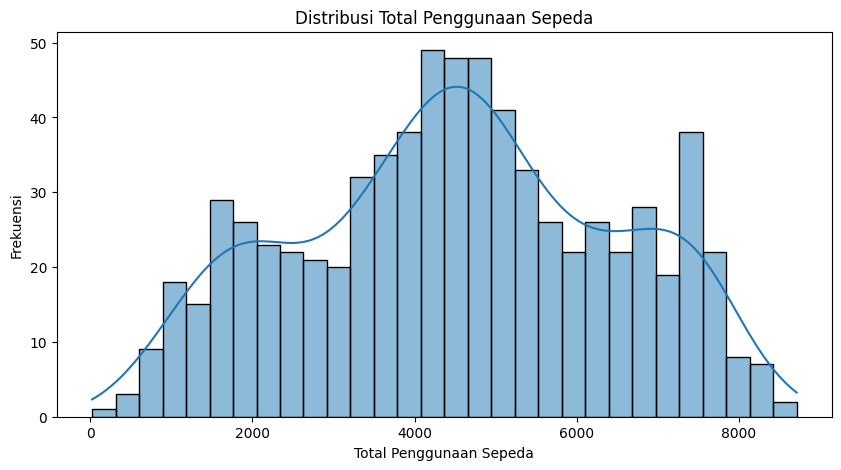

In [388]:
plt.figure(figsize=(10, 5))
sns.histplot(df_day['total'], bins=30, kde=True)
plt.title('Distribusi Total Penggunaan Sepeda')
plt.xlabel('Total Penggunaan Sepeda')
plt.ylabel('Frekuensi')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa faktor-faktor utama yang mempengaruhi tingkat penggunaan sepeda pada waktu-waktu tertentu?

1. Pengaruh Musim Terhadap Penggunaan Sepeda

Text(0, 0.5, 'Rata-rata Total Penggunaan Sepeda')

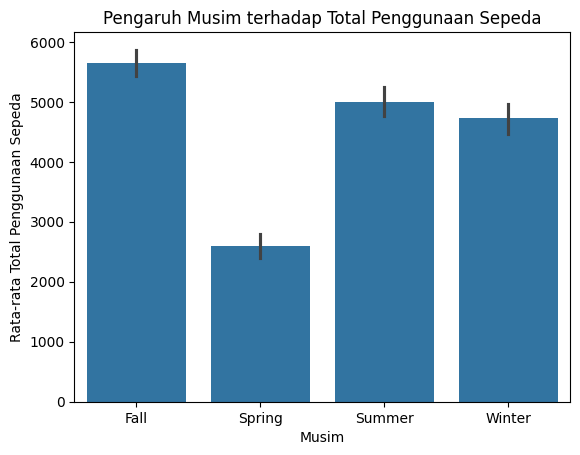

In [389]:
plt.subplot(1, 1, 1)
sns.barplot(x='season', y='total', data=df_day, estimator=np.mean)
plt.title('Pengaruh Musim terhadap Total Penggunaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Total Penggunaan Sepeda')

2. Pengaruh Cuaca terhadap Total Penggunaan Sepeda

Text(0, 0.5, 'Rata-rata Total Penggunaan Sepeda')

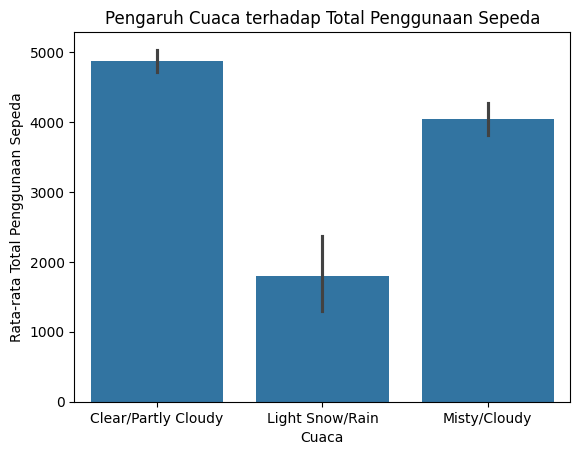

In [390]:
plt.subplot(1, 1, 1)
sns.barplot(x='weather_situation', y='total', data=df_day, estimator=np.mean)
plt.title('Pengaruh Cuaca terhadap Total Penggunaan Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata Total Penggunaan Sepeda')


3. Pengaruh Suhu Terhadap Penggunaan Sepeda

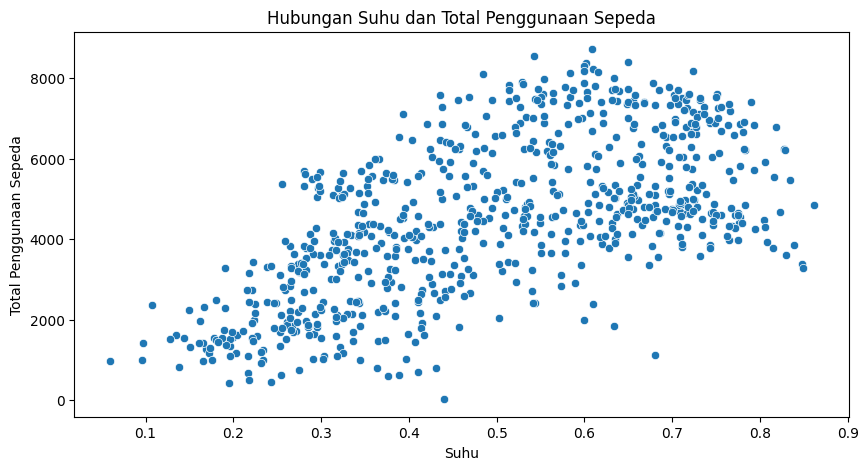

In [391]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='temperature', y='total', data=df_day)
plt.title('Hubungan Suhu dan Total Penggunaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Total Penggunaan Sepeda')
plt.show()

4. Pengaruh Kelembaban Terhadap Penggunaan Sepeda

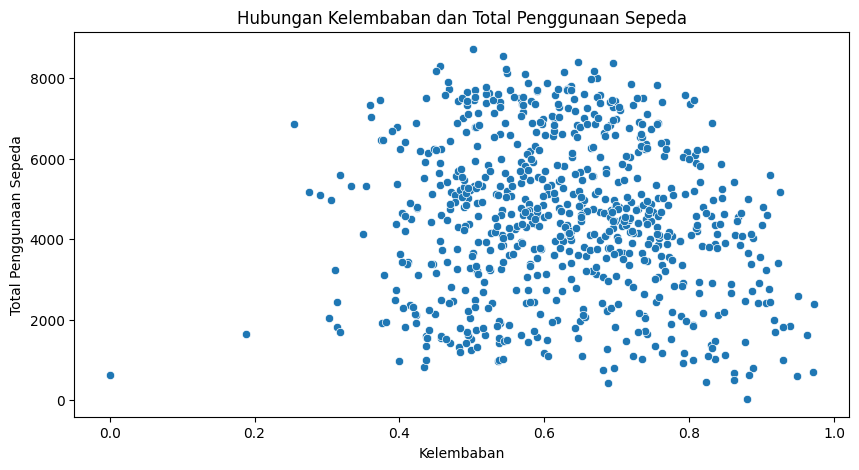

In [392]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='humidity', y='total', data=df_day)
plt.title('Hubungan Kelembaban dan Total Penggunaan Sepeda')
plt.xlabel('Kelembaban')
plt.ylabel('Total Penggunaan Sepeda')
plt.show()

### Pertanyaan 2: Bagaimana pola penggunaan sepeda bervariasi antara hari kerja dan akhir pekan?

1. Pengaruh Hari Kerja vs Akhir Pekan Terhadap Penggunaan Sepeda

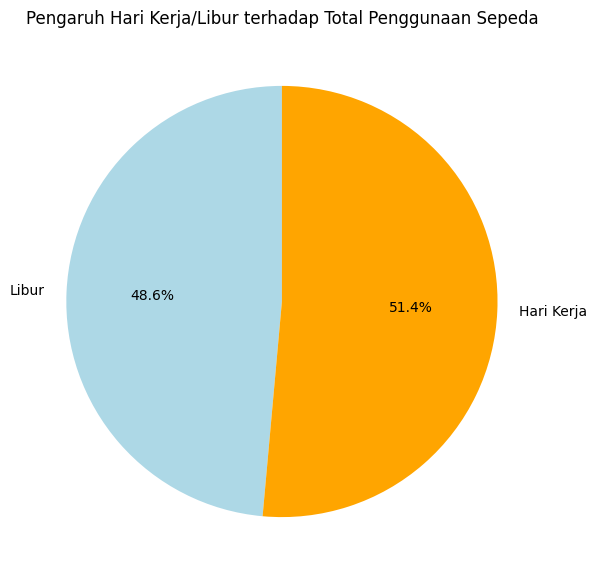

In [393]:
workingday_data = df_day.groupby('workingday')['total'].mean()
plt.figure(figsize=(7, 7))
plt.pie(workingday_data, labels=['Libur', 'Hari Kerja'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Pengaruh Hari Kerja/Libur terhadap Total Penggunaan Sepeda')
plt.show()

2. Pengaruh Hari Dalam Seminggu Terhadap Penggunaan Sepeda

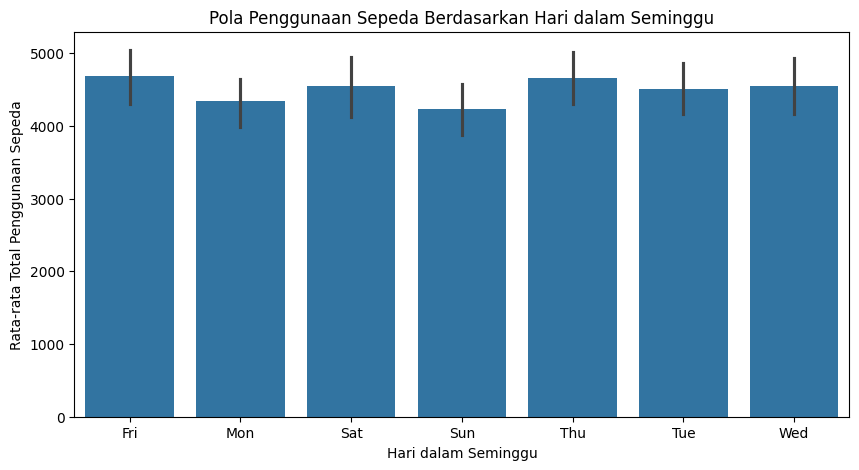

In [394]:
plt.figure(figsize=(10, 5))
sns.barplot(x='weekday', y='total', data=df_day, estimator=np.mean)
plt.title('Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Total Penggunaan Sepeda')
plt.show()

3. Penggunaan Sepeda oleh Pengguna Kasual dan Terdaftar pada Hari Kerja vs Akhir Pekan

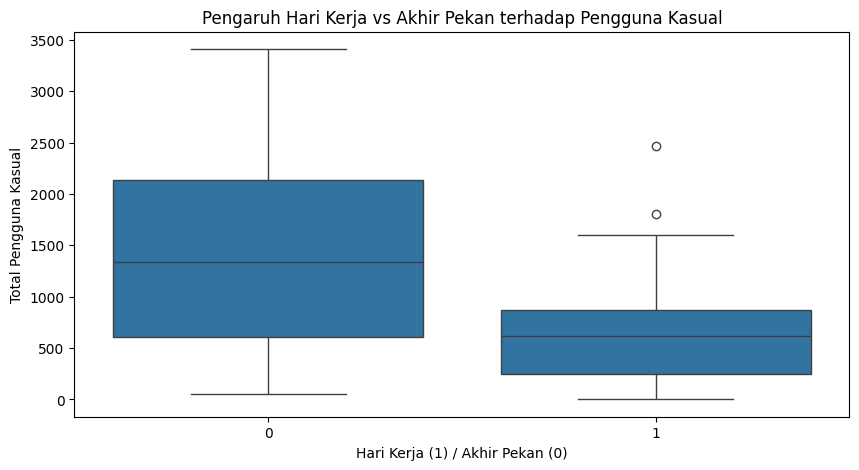

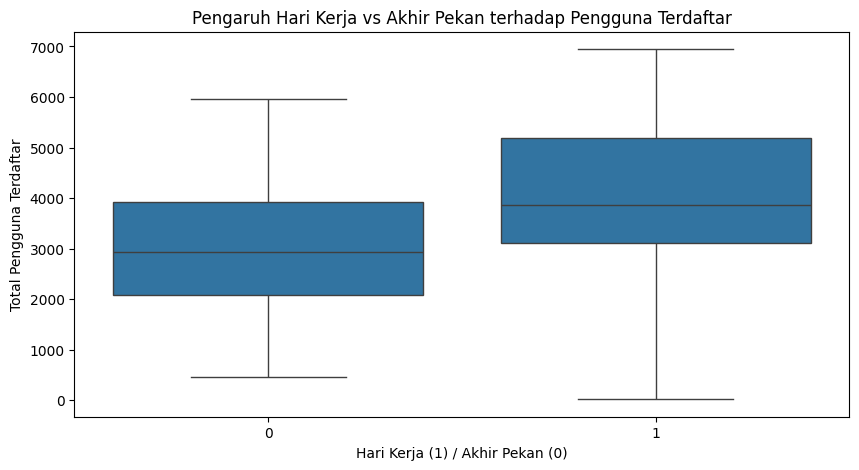

In [395]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='workingday', y='casual', data=df_day)
plt.title('Pengaruh Hari Kerja vs Akhir Pekan terhadap Pengguna Kasual')
plt.xlabel('Hari Kerja (1) / Akhir Pekan (0)')
plt.ylabel('Total Pengguna Kasual')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='workingday', y='registered', data=df_day)
plt.title('Pengaruh Hari Kerja vs Akhir Pekan terhadap Pengguna Terdaftar')
plt.xlabel('Hari Kerja (1) / Akhir Pekan (0)')
plt.ylabel('Total Pengguna Terdaftar')
plt.show()

4. Total Penggunaan Sepeda Kasual vs Terdaftar pada Hari dalam Seminggu

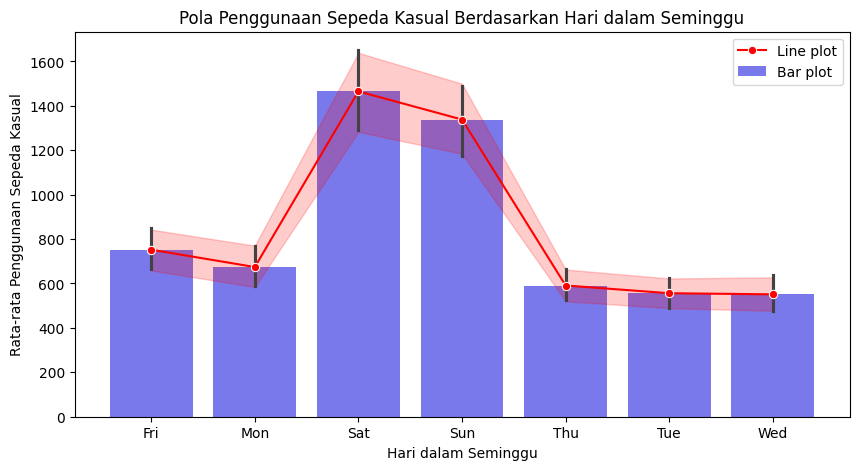

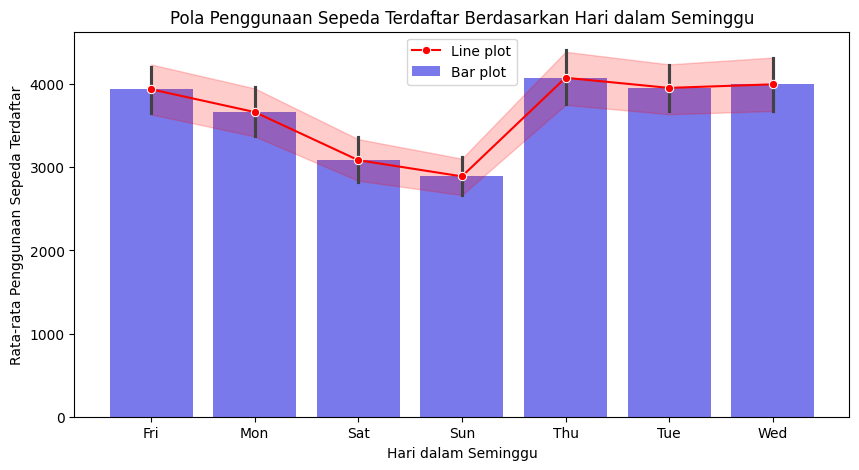

In [396]:
plt.figure(figsize=(10, 5))
sns.barplot(x='weekday', y='casual', data=df_day, estimator=np.mean, alpha=0.6, color='blue', label='Bar plot')
sns.lineplot(x='weekday', y='casual', data=df_day, estimator=np.mean, marker='o', color='red', label='Line plot')

plt.title('Pola Penggunaan Sepeda Kasual Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Penggunaan Sepeda Kasual')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='weekday', y='registered', data=df_day, estimator=np.mean, alpha=0.6, color='blue', label='Bar plot')
sns.lineplot(x='weekday', y='registered', data=df_day, estimator=np.mean, marker='o', color='red', label='Line plot')
plt.title('Pola Penggunaan Sepeda Terdaftar Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Penggunaan Sepeda Terdaftar')
plt.legend()
plt.show()

### Pertanyaan 3: Bagaimana pola penggunaan sepeda bervariasi berdasarkan tahun, bulan dan minggu?

1. Tren Penggunaan Sepeda Berdasarkan Tahun

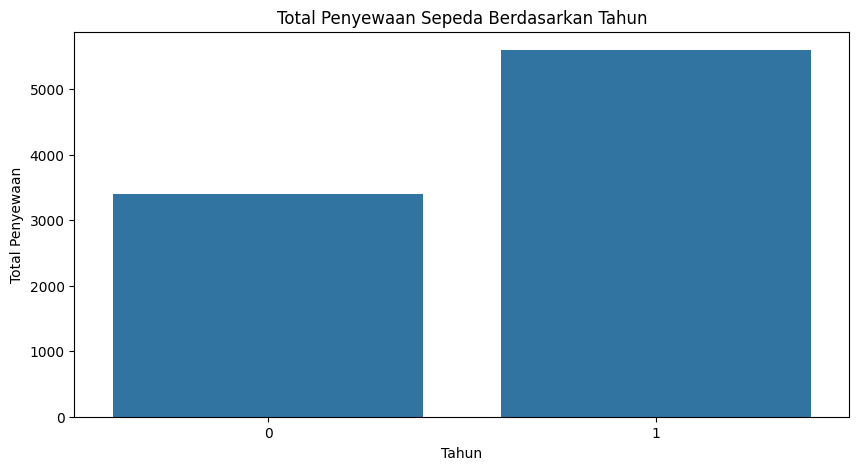

In [397]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_day, x='year', y='total', ci=None)
plt.title('Total Penyewaan Sepeda Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penyewaan')
plt.show()

2. Tren Penggunaan Sepeda Berdasarkan Bulan

Text(0, 0.5, 'Rata-rata Total Penggunaan Sepeda')

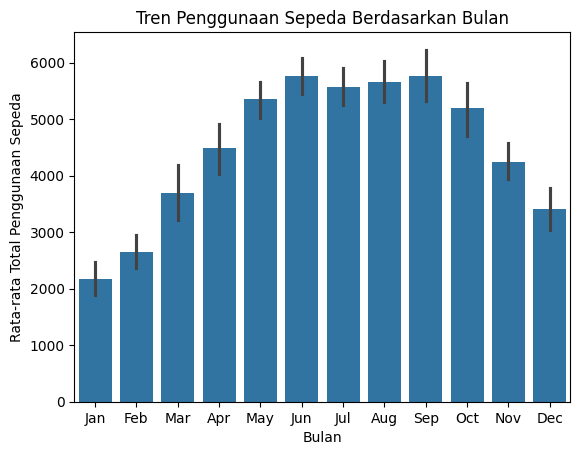

In [398]:
plt.subplot(1, 1, 1)
sns.barplot(x='month', y='total', data=df_day, estimator=np.mean, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Tren Penggunaan Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Total Penggunaan Sepeda')


3. Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu

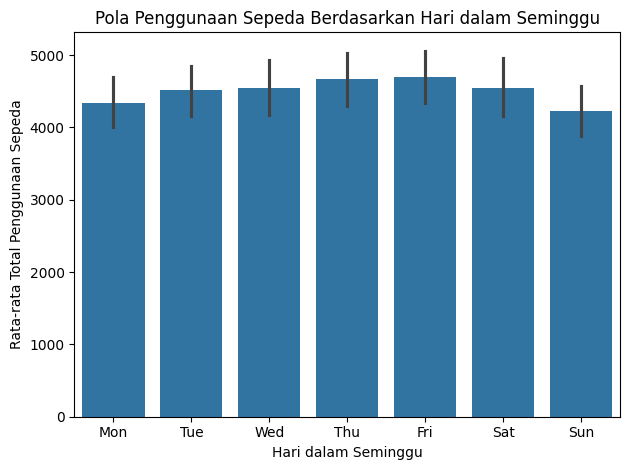

In [399]:
plt.subplot(1, 1, 1)
sns.barplot(x='weekday', y='total', data=df_day, estimator=np.mean, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Total Penggunaan Sepeda')
plt.tight_layout()
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2